In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data loading and exploratory analysis

In [2]:
#read in the data set
#consists of 1.5 million million reviews 
df = pd.read_csv("beer_reviews.csv")
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [3]:
unique_breweries = df['brewery_id'].unique()
unique_reviewers = df['review_profilename'].unique()
unique_styles = df['beer_style'].unique()
unique_beers = df['beer_beerid'].unique()

print(f"There are {len(unique_breweries)} unique breweries.")
print(f"{len(unique_reviewers)} unique reviewers.")
print(f"{len(unique_styles)} unique beers styles.")
print(f"{len(unique_beers)} unique beers.\n")
print(df.shape)

There are 5840 unique breweries.
33388 unique reviewers.
104 unique beers styles.
66055 unique beers.

(1586614, 13)


In [4]:
#Change review_time to datetime
df['review_time'] = pd.to_datetime( df['review_time'], unit='s')
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


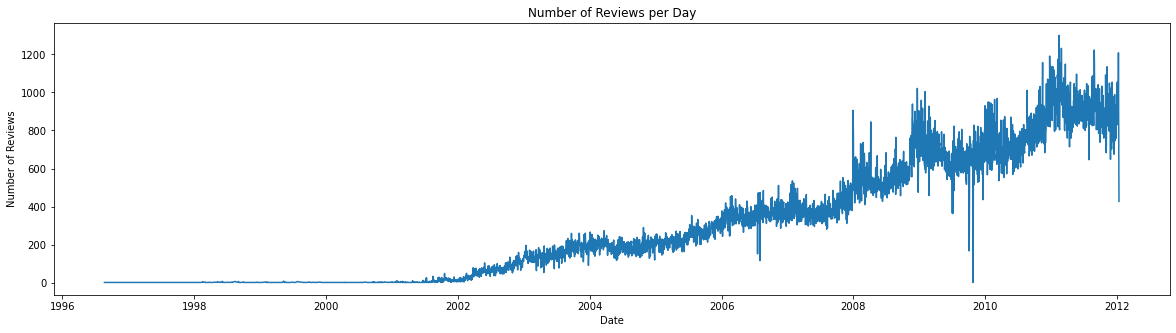

In [5]:
group_by_date = df[['review_time']].groupby( df['review_time'].dt.date ).agg(['count'])

plt.figure(figsize=(20,5))
plt.plot(group_by_date)
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Day')
plt.show()